In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
train9 = pd.read_csv('train/train9.csv')
train1 = pd.read_csv('train/train1.csv')
test9 = pd.read_csv('test/test9.csv')
test1 = pd.read_csv('test/test1.csv')
encoded_hero = pd.read_csv('train/encoded_hero_data.csv')

In [3]:
train9.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,74,1_74,304,185,3743.699732
1,1,65,1_65,255,151,4009.021513
2,1,39,1_39,203,135,5094.621514
3,1,106,1_106,158,106,4619.212963
4,1,2,1_2,157,94,2871.627907


In [7]:
# rows and columns size of train9
train9.shape

(18846, 6)

In [5]:
# number of unique users 
len(train9['user_id'].unique())

2094

In [6]:
train9['user_id'].max()

2992

In [8]:
# train9 unique * 9 = ?
2094 * 9
# so we have 2094 unique users and each has 9 records so total records are 18846 

18846

In [9]:
# it seems like some of the users are are present in train data and some of them are in test data 

In [10]:
train9.isnull().sum()
# no null values

user_id      0
hero_id      0
id           0
num_games    0
num_wins     0
kda_ratio    0
dtype: int64

In [26]:
# find uniqe hero_ids per user_id
train9.groupby('user_id')['hero_id'].nunique().sum()
# some of the users has played with only 7 or 8 heros but we have 9 records per user 
# but we don't have any duplicate values that means for same user with same hero num_games or num_win might be different
# here the sum is 18569 which is less than size of train9 18846
# if we had  9 unique hero per user than the sum has to be 2094 * 9 = 18846 (which is size of train9)
# that shows that hero_id are repeating for a user

18569

In [30]:
train9.groupby(['user_id', 'hero_id'])['num_games'].nunique().sum()
# here sum is 18846 that means we have unique records 

18846

In [31]:
train9.groupby(['user_id', 'hero_id', 'num_games'])['num_wins'].nunique().sum()

18846

In [32]:
train1.head()

,user_id,hero_id,id,num_games,num_wins,kda_ratio
0,1,41,1_41,201,125,3731.707317
1,2,17,2_17,427,234,2922.058381
2,5,106,5_106,240,130,5116.682739
3,6,65,6_65,206,122,4131.553861
4,7,69,7_69,697,382,2474.469306


In [33]:
train1_uni = train1['user_id'].unique()
train9_uni = train9['user_id'].unique()

In [34]:
nin_train9 = []
for i in train1_uni:
    if i not in train9_uni:
        nin_train9.append(i)

In [35]:
nin_train9

[]

In [36]:
hero_data = pd.read_csv('train/hero_data.csv')

In [37]:
hero_data.head()

,hero_id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,base_agility,base_intelligence,strength_gain,agility_gain,intelligence_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
0,1,agi,Melee,Carry:Escape:Nuker,200,1.50,75,0.9,-1.0,25,...,22,12,1.3,2.8,1.8,150,0,1.45,310,0.5
1,2,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,75,0.9,-1.0,25,...,20,18,2.8,2.2,1.6,150,900,1.70,290,0.6
2,3,int,Ranged,Support:Disabler:Nuker:Durable,200,1.50,75,0.9,1.0,25,...,23,23,2.4,2.4,2.4,400,900,1.70,310,0.6
3,4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator,200,1.50,75,0.9,0.0,25,...,24,18,2.7,3.0,1.7,150,900,1.70,285,0.5
4,5,int,Ranged,Support:Disabler:Nuker:Jungler,200,1.50,75,0.9,-1.0,25,...,16,16,2.0,1.6,2.9,600,900,1.70,275,0.5


In [38]:
hero_data['primary_attr'].unique()

array(['agi', 'str', 'int'], dtype=object)

In [41]:
roles_list = hero_data['roles'].tolist()

In [44]:
roles =  set()

In [47]:
for rol_str in roles_list:
    r_l = rol_str.split(':')
    for i in r_l:
        roles.add(i)

In [48]:
roles

{'Carry',
 'Disabler',
 'Durable',
 'Escape',
 'Initiator',
 'Jungler',
 'Nuker',
 'Pusher',
 'Support'}

In [73]:
roles_df = pd.DataFrame(columns=roles)

In [74]:
roles_df

,Carry,Jungler,Support,Initiator,Disabler,Escape,Nuker,Durable,Pusher


In [75]:
ite = 0
for x in hero_data['roles'].apply(lambda x : x.split(':')):
    for i in x:
        roles_df.loc[ite, i] = 1
    ite = ite + 1

In [76]:
roles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 9 columns):
Carry        63 non-null object
Jungler      15 non-null object
Support      40 non-null object
Initiator    52 non-null object
Disabler     84 non-null object
Escape       46 non-null object
Nuker        83 non-null object
Durable      46 non-null object
Pusher       29 non-null object
dtypes: object(9)
memory usage: 14.0+ KB


In [80]:
roles_df['Carry'].fillna(0, inplace=True)

In [84]:
for col in roles_df.columns:
    roles_df[col].fillna(0, inplace=True)

In [86]:
roles_df.head()

,Carry,Jungler,Support,Initiator,Disabler,Escape,Nuker,Durable,Pusher
0,1,0,0,0,0,1,1,0,0
1,0,1,0,1,1,0,0,1,0
2,0,0,1,0,1,0,1,1,0
3,1,1,0,1,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0


In [88]:
hero_data = hero_data.join(roles_df)

In [89]:
hero_data.head()

,hero_id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,turn_rate,Carry,Jungler,Support,Initiator,Disabler,Escape,Nuker,Durable,Pusher
0,1,agi,Melee,Carry:Escape:Nuker,200,1.50,75,0.9,-1.0,25,...,0.5,1,0,0,0,0,1,1,0,0
1,2,str,Melee,Initiator:Durable:Disabler:Jungler,200,4.25,75,0.9,-1.0,25,...,0.6,0,1,0,1,1,0,0,1,0
2,3,int,Ranged,Support:Disabler:Nuker:Durable,200,1.50,75,0.9,1.0,25,...,0.6,0,0,1,0,1,0,1,1,0
3,4,agi,Melee,Carry:Disabler:Jungler:Nuker:Initiator,200,1.50,75,0.9,0.0,25,...,0.5,1,1,0,1,1,0,1,0,0
4,5,int,Ranged,Support:Disabler:Nuker:Jungler,200,1.50,75,0.9,-1.0,25,...,0.5,0,1,1,0,1,0,1,0,0


In [92]:
hero_data.drop('roles', axis=1, inplace=True)

In [93]:
hero_data.head()

,hero_id,primary_attr,attack_type,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,...,turn_rate,Carry,Jungler,Support,Initiator,Disabler,Escape,Nuker,Durable,Pusher
0,1,agi,Melee,200,1.50,75,0.9,-1.0,25,27,...,0.5,1,0,0,0,0,1,1,0,0
1,2,str,Melee,200,4.25,75,0.9,-1.0,25,24,...,0.6,0,1,0,1,1,0,0,1,0
2,3,int,Ranged,200,1.50,75,0.9,1.0,25,37,...,0.6,0,0,1,0,1,0,1,1,0
3,4,agi,Melee,200,1.50,75,0.9,0.0,25,33,...,0.5,1,1,0,1,1,0,1,0,0
4,5,int,Ranged,200,1.50,75,0.9,-1.0,25,19,...,0.5,0,1,1,0,1,0,1,0,0


In [94]:
p_a_oh = pd.get_dummies(hero_data['primary_attr'])

In [96]:
hero_data.drop('primary_attr', axis=1, inplace=True)

In [97]:
hero_data = hero_data.join(p_a_oh)

In [99]:
a_t_oh = pd.get_dummies(hero_data['attack_type'])

In [100]:
hero_data.drop('attack_type', axis=1, inplace=True)

In [101]:
hero_data = hero_data.join(a_t_oh)

In [103]:
hero_data.head()

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,1,200,1.50,75,0.9,-1.0,25,27,31,22,...,0,1,1,0,0,1,0,0,1,0
1,2,200,4.25,75,0.9,-1.0,25,24,28,25,...,1,0,0,1,0,0,0,1,1,0
2,3,200,1.50,75,0.9,1.0,25,37,43,23,...,1,0,1,1,0,0,1,0,0,1
3,4,200,1.50,75,0.9,0.0,25,33,39,23,...,1,0,1,0,0,1,0,0,1,0
4,5,200,1.50,75,0.9,-1.0,25,19,25,16,...,1,0,1,0,0,0,1,0,0,1


In [104]:
hero_data.to_csv('train/final_hero_data.csv', index=False, encoding='utf-8')

In [106]:
train9_hero_add

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged


In [3]:
def make_hero_data(df, rows):
    hero_add = pd.DataFrame(index= np.arange(0, rows), columns=hero_data.columns)
    i = 0
    for r in df['hero_id']:
        hero_add.loc[i] = hero_data[hero_data['hero_id'] == r].values.tolist()[0]
        i = i + 1
    return hero_add

In [116]:
train9_hd = make_hero_data(train9)

In [119]:
train9_hd.head()

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,74,200,1.50,75,0.9,-1.0,25,19,25,16,...,1,1,1,0,1,0,1,0,0,1
1,65,200,3.25,75,0.9,0.0,25,14,18,23,...,1,1,0,0,0,0,1,0,0,1
2,39,200,1.50,75,0.9,-1.0,25,21,29,16,...,0,1,1,0,0,0,1,0,0,1
3,106,200,2.00,75,0.9,-2.0,25,30,34,19,...,1,1,1,0,0,1,0,0,1,0
4,2,200,4.25,75,0.9,-1.0,25,24,28,25,...,1,0,0,1,0,0,0,1,1,0


In [133]:
train1_hd = make_hero_data(train1, train1.shape[0])

In [136]:
train1_hd.head()

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,41,200,2,75,0.9,0,25,33,39,23,...,1,1,0,1,0,1,0,0,1,0
1,17,200,1.5,75,0.9,2,25,22,32,19,...,1,1,1,0,0,0,1,0,0,1
2,106,200,2,75,0.9,-2,25,30,34,19,...,1,1,1,0,0,1,0,0,1,0
3,65,200,3.25,75,0.9,0,25,14,18,23,...,1,1,0,0,0,0,1,0,0,1
4,69,200,1.5,75,0.9,-1,25,27,43,26,...,1,0,1,1,0,0,0,1,1,0


In [138]:
test9_hd = make_hero_data(test9, test9.shape[0])

In [145]:
test9_hd.head()

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,65,200,3.25,75,0.9,0,25,14,18,23,...,1,1,0,0,0,0,1,0,0,1
1,104,200,1.5,75,0.9,0,25,35,39,26,...,1,0,1,1,0,0,0,1,1,0
2,7,200,2,75,0.9,1,25,24,34,22,...,1,0,1,0,0,0,0,1,1,0
3,19,200,2.5,75,0.9,0,25,44,50,30,...,1,0,1,1,1,0,0,1,1,0
4,4,200,1.5,75,0.9,0,25,33,39,23,...,1,0,1,0,0,1,0,0,1,0


In [146]:
test1_hd = make_hero_data(test1, test1.shape[0])

In [149]:
test1_hd.head()

,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,base_attack_min,base_attack_max,base_strength,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,53,200,1.5,75,0.9,1,25,30,44,19,...,0,1,1,0,1,0,1,0,0,1
1,17,200,1.5,75,0.9,2,25,22,32,19,...,1,1,1,0,0,0,1,0,0,1
2,51,200,1.5,75,0.9,0,25,28,30,26,...,1,0,1,1,0,0,0,1,1,0
3,54,200,1.5,75,0.9,-1,25,27,37,25,...,1,1,0,1,0,0,0,1,1,0
4,74,200,1.5,75,0.9,-1,25,19,25,16,...,1,1,1,0,1,0,1,0,0,1


In [150]:
train9.drop('hero_id', axis=1, inplace=True)

In [151]:
train9.head()

,user_id,id,num_games,num_wins,kda_ratio
0,1,1_74,304,185,3743.699732
1,1,1_65,255,151,4009.021513
2,1,1_39,203,135,5094.621514
3,1,1_106,158,106,4619.212963
4,1,1_2,157,94,2871.627907


In [152]:
train1.drop('hero_id', axis=1, inplace=True)
test9.drop('hero_id', axis=1, inplace=True)
test1.drop('hero_id', axis=1, inplace=True)

In [153]:
train9 = train9.join(train9_hd)

In [154]:
train9.head()

,user_id,id,num_games,num_wins,kda_ratio,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,1,1_74,304,185,3743.699732,74,200,1.50,75,0.9,...,1,1,1,0,1,0,1,0,0,1
1,1,1_65,255,151,4009.021513,65,200,3.25,75,0.9,...,1,1,0,0,0,0,1,0,0,1
2,1,1_39,203,135,5094.621514,39,200,1.50,75,0.9,...,0,1,1,0,0,0,1,0,0,1
3,1,1_106,158,106,4619.212963,106,200,2.00,75,0.9,...,1,1,1,0,0,1,0,0,1,0
4,1,1_2,157,94,2871.627907,2,200,4.25,75,0.9,...,1,0,0,1,0,0,0,1,1,0


In [155]:
train1 = train1.join(train1_hd)

In [156]:
test9 = test9.join(test9_hd)

In [157]:
test1 = test1.join(test1_hd)

In [158]:
train1.head()

,user_id,id,num_games,num_wins,kda_ratio,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,1,1_41,201,125,3731.707317,41,200,2,75,0.9,...,1,1,0,1,0,1,0,0,1,0
1,2,2_17,427,234,2922.058381,17,200,1.5,75,0.9,...,1,1,1,0,0,0,1,0,0,1
2,5,5_106,240,130,5116.682739,106,200,2,75,0.9,...,1,1,1,0,0,1,0,0,1,0
3,6,6_65,206,122,4131.553861,65,200,3.25,75,0.9,...,1,1,0,0,0,0,1,0,0,1
4,7,7_69,697,382,2474.469306,69,200,1.5,75,0.9,...,1,0,1,1,0,0,0,1,1,0


In [159]:
test1.head()

,user_id,id,num_games,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_magic_resistance,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,3,3_53,278,53,200,1.5,75,0.9,1,25,...,0,1,1,0,1,0,1,0,0,1
1,4,4_17,180,17,200,1.5,75,0.9,2,25,...,1,1,1,0,0,0,1,0,0,1
2,9,9_51,70,51,200,1.5,75,0.9,0,25,...,1,0,1,1,0,0,0,1,1,0
3,10,10_54,189,54,200,1.5,75,0.9,-1,25,...,1,1,0,1,0,0,0,1,1,0
4,15,15_74,263,74,200,1.5,75,0.9,-1,25,...,1,1,1,0,1,0,1,0,0,1


In [160]:
test9.head()

,user_id,id,num_games,num_wins,kda_ratio,hero_id,base_health,base_health_regen,base_mana,base_mana_regen,...,Disabler,Escape,Nuker,Durable,Pusher,agi,int,str,Melee,Ranged
0,3,3_65,330,183,3418.470419,65,200,3.25,75,0.9,...,1,1,0,0,0,0,1,0,0,1
1,3,3_104,231,107,2522.639069,104,200,1.5,75,0.9,...,1,0,1,1,0,0,0,1,1,0
2,3,3_7,200,103,2793.255132,7,200,2,75,0.9,...,1,0,1,0,0,0,0,1,1,0
3,3,3_19,189,91,3493.495230,19,200,2.5,75,0.9,...,1,0,1,1,1,0,0,1,1,0
4,3,3_4,182,102,3586.402266,4,200,1.5,75,0.9,...,1,0,1,0,0,1,0,0,1,0


In [161]:
train9.to_csv('train/train9_final.csv', index=False, encoding='utf-8')
train1.to_csv('train/train1_final.csv', index=False, encoding='utf-8')
test9.to_csv('test/test9_final.csv', index=False, encoding='utf-8')
test1.to_csv('test/test1_final.csv', index=False, encoding='utf-8')

In [5]:
def make_enc_hero_data(df, rows):
    hero_add = pd.DataFrame(index= np.arange(0, rows), columns=encoded_hero.columns)
    i = 0
    for r in df['hero_id']:
        hero_add.loc[i] = encoded_hero[encoded_hero['hero_id'] == r].values.tolist()[0]
        i = i + 1
    return hero_add

In [7]:
t9 = make_enc_hero_data(train9, train9.shape[0])

In [10]:
train9.drop('hero_id', axis=1, inplace=True)

In [11]:
train9 = train9.join(t9)

In [13]:
t1 = make_enc_hero_data(train1, train1.shape[0])
train1.drop('hero_id', axis=1, inplace=True)
train1 = train1.join(t1)

te9 = make_enc_hero_data(test9, test9.shape[0])
test9.drop('hero_id', axis=1, inplace=True)
test9 = test9.join(te9)

te1 = make_enc_hero_data(test1, test1.shape[0])
test1.drop('hero_id', axis=1, inplace=True)
test1 = test1.join(te1)

In [18]:
train9.to_csv('train/train9_enc.csv', index=False, encoding='utf-8')
train1.to_csv('train/train1_enc.csv', index=False, encoding='utf-8')
test9.to_csv('test/test9_enc.csv', index=False, encoding='utf-8')
test1.to_csv('test/test1_enc.csv', index=False, encoding='utf-8')

In [28]:
train9.columns

Index(['user_id', 'id', 'num_games', 'num_wins', 'kda_ratio', 'f1', 'f2', 'f3',
       'f4', 'hero_id'],
      dtype='object')

In [32]:
temp = train9[train9['user_id'] == 1][['num_games', 'f1', 'f2', 'f3', 'f4', 'num_wins','kda_ratio']]

In [39]:
temp.astype(int)

,num_games,f1,f2,f3,f4,num_wins,kda_ratio
0,304,0,0,0,0,185,3743
1,255,0,1,0,0,151,4009
2,203,0,0,0,0,135,5094
3,158,0,0,1,-1,106,4619
4,157,0,0,1,0,94,2871
5,154,0,0,0,-1,103,3533
6,128,0,0,1,-1,78,3635
7,118,0,0,0,0,75,3732
8,116,0,0,1,0,65,3477


In [24]:
corr

,num_games,num_wins,kda_ratio
num_games,1.000000,0.987247,0.245599
num_wins,0.987247,1.000000,0.348015
kda_ratio,0.245599,0.348015,1.000000


<IPython.core.display.Javascript object>


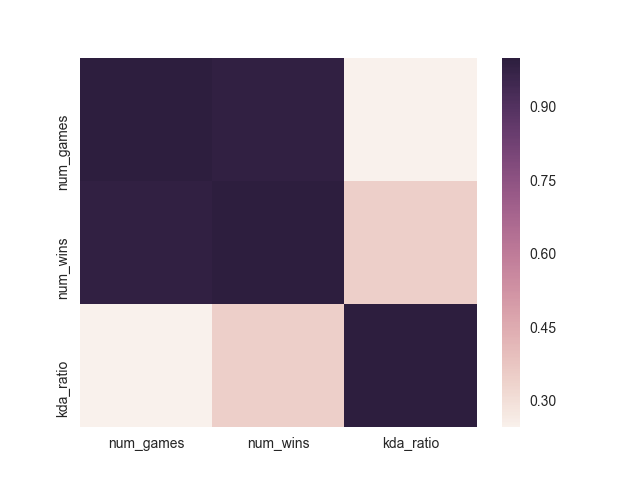

In [26]:
sns.heatmap(corr)

In [40]:
train9 = pd.read_csv('train/train9_enc.csv')
train1 = pd.read_csv('train/train1_enc.csv')
test9 = pd.read_csv('test/test9_enc.csv')
test1 = pd.read_csv('test/test1_enc.csv')
encoded_hero = pd.read_csv('train/encoded_hero_data.csv')

In [46]:
corr = train9[train9['user_id'] == 1][['num_games', 'num_wins', 'f1', 'f2', 'f3', 'f4', 'kda_ratio']].corr()

In [47]:
corr

,num_games,num_wins,f1,f2,f3,f4,kda_ratio
num_games,1.000000,0.987247,-0.085666,0.536889,-0.546098,0.434498,0.245599
num_wins,0.987247,1.000000,0.055994,0.510458,-0.626393,0.350831,0.348015
f1,-0.085666,0.055994,1.000000,-0.296046,-0.500496,-0.592141,0.675774
f2,0.536889,0.510458,-0.296046,1.000000,-0.430225,0.337328,0.208010
f3,-0.546098,-0.626393,-0.500496,-0.430225,1.000000,-0.108828,-0.472486
f4,0.434498,0.350831,-0.592141,0.337328,-0.108828,1.000000,-0.398442
kda_ratio,0.245599,0.348015,0.675774,0.208010,-0.472486,-0.398442,1.000000


<IPython.core.display.Javascript object>


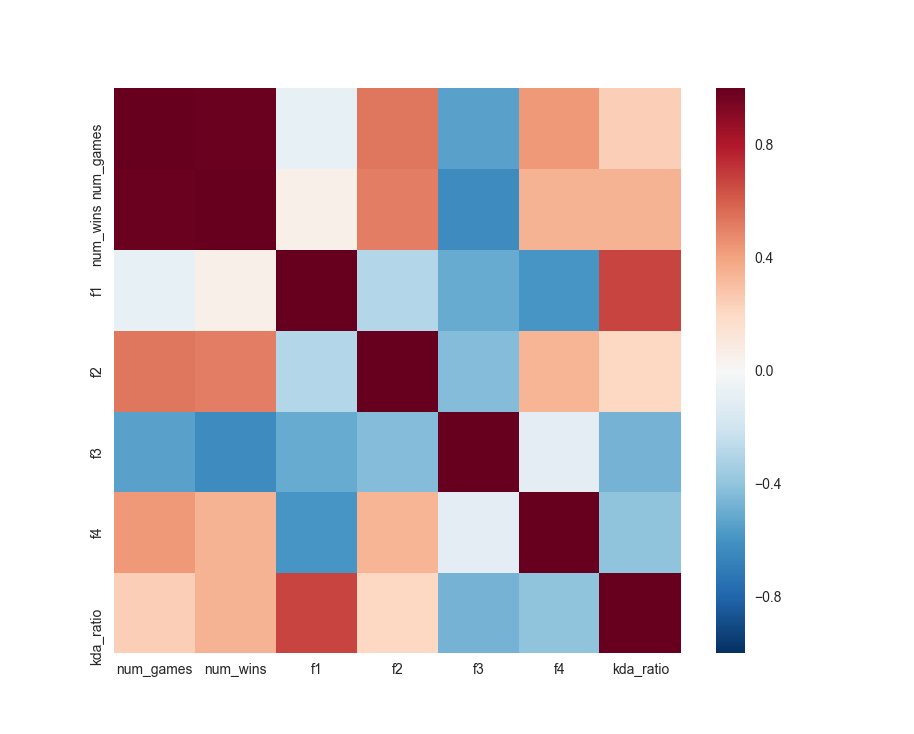

In [49]:
sns.heatmap(corr)

In [50]:
corr = train9[train9['user_id'] == 2][['num_games', 'num_wins', 'f1', 'f2', 'f3', 'f4', 'kda_ratio']].corr()

<IPython.core.display.Javascript object>


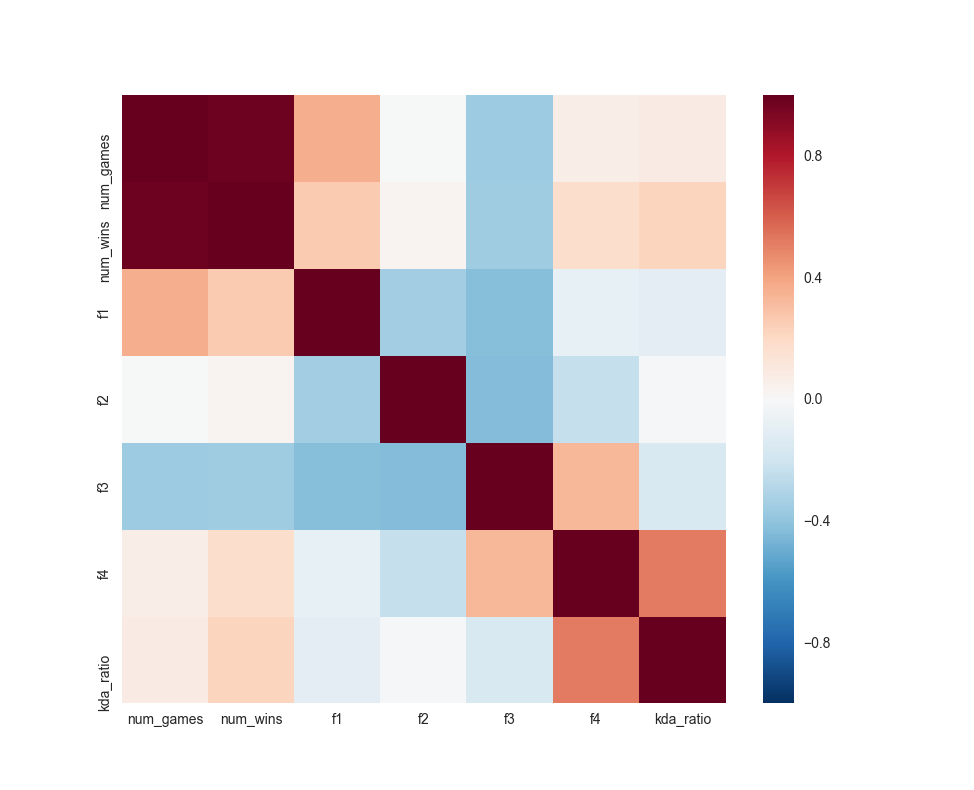

In [52]:
sns.heatmap(corr)

In [53]:
corr = train9[['num_games', 'num_wins', 'f1', 'f2', 'f3', 'f4', 'kda_ratio']].corr()

<IPython.core.display.Javascript object>


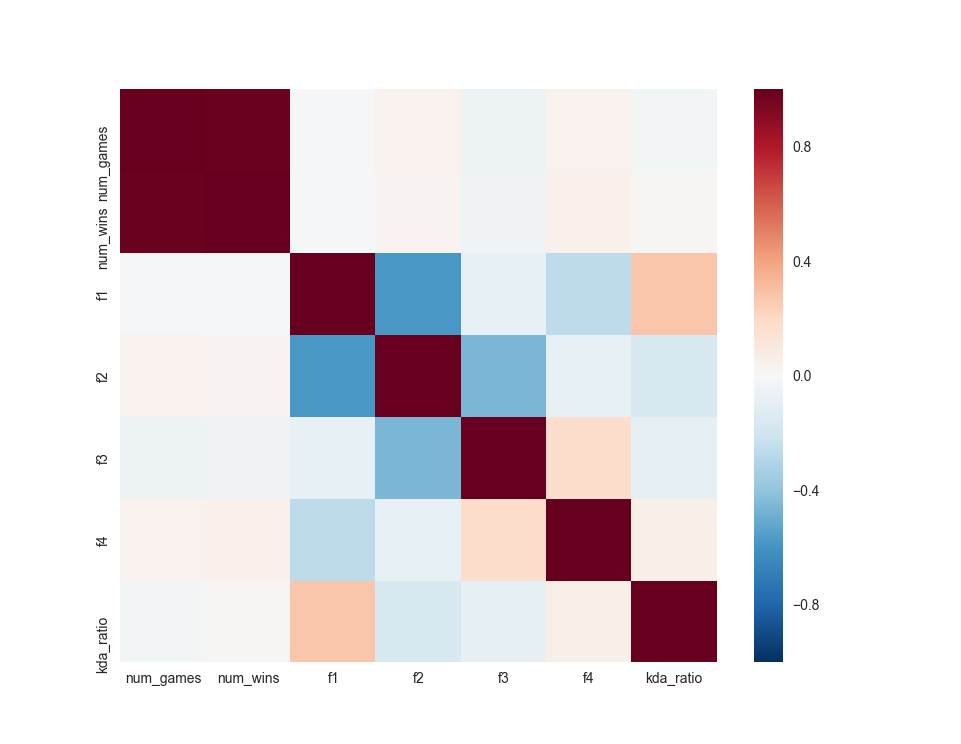

In [54]:
sns.heatmap(corr)